# Adaptive filters in  Real-time with PADASIP Module

This tutorial shows how to use Padasip module for filtering and prediction with adaptive filters in real-time.

Lets start with importing padasip. In the following examples we will also use numpy and matplotlib.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import padasip as pa

## One Sample Ahead Prediction Example with the NLMS Filter

Consider measurement of a variable $\textbf{d}$ in time $k$. The inputs of the system which produces this variable is also measured at every sample $\textbf{x}(k)$. We will simulate the measurement via the following function

In [2]:
def measure_x():
    # input vector of size 3
    x = np.random.random(3)
    return x

def measure_d(x):
    # meausure system output
    d = 2*x[0] + 1*x[1] - 1.5*x[2]
    return d
    

For prediction of the variable $d(k)$ it is possible to use any implemented fitler (LMS, RLS, NLMS). In this case the NLMS filter is used. The filter (as a size of 10 in this example) can be created as follows

In [3]:
filt = pa.filters.FilterNLMS(3, mu=1.)

Now the created filter can be used in the loop in real time as

In [4]:
N = 100
log_d = np.zeros(N)
log_y = np.zeros(N)

for k in range(N):
    # measure input
    x = measure_x()
    
    # predict new value
    y = filt.predict(x)
    
    # do the important stuff with prediction output
    pass    
    
    # measure output
    d = measure_d(x)
    
    # update filter
    filt.adapt(d, x)
    
    # log values
    log_d[k] = d
    log_y[k] = y

Now, according to logged values it is possible to display the learning process of the filter.

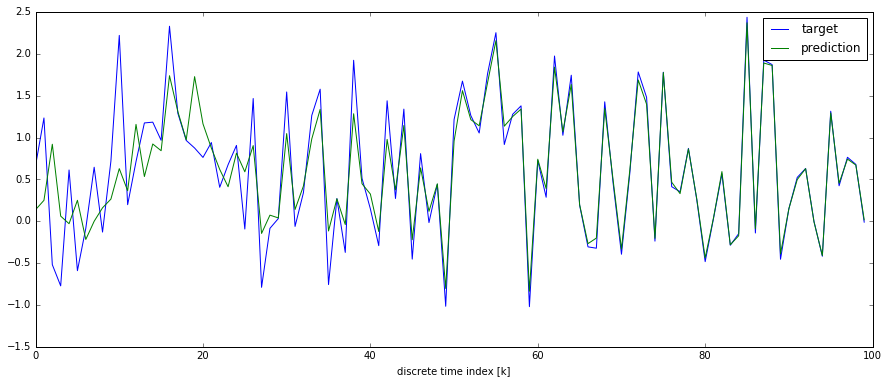

In [5]:
plt.figure(figsize=(15,6))
plt.plot(log_d, "b", label="target")
plt.plot(log_y, "g", label="prediction")
plt.xlabel("discrete time index [k]")
plt.legend()
plt.show()